## 🧠 Project Overview
# Retail Sales Analysis (SQL ➝ Python ➝ Tableau)

This project explores retail sales data initially cleaned using PostgreSQL, then analyzed with Python (`pandas`, `matplotlib`) and visualized in Tableau.

📁 **Dataset**: Order-level retail sales, including product line, pricing, location, and customer info.

🛠️ **Tools**: PostgreSQL, Python (pandas, matplotlib), Tableau

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/brimm/Downloads/sales_data.csv')

## 📂 Loading the Dataset

- The dataset includes detailed records of customer orders, product lines, order dates, and financial metrics like sales and pricing.
- We’ll begin by loading the dataset into a DataFrame and previewing the structure.

## 📋 Data Preview

We use `df.head()` to preview the first few rows of the dataset and get a sense of the structure and content of the table.

In [95]:
df.head()

,order_number,quantity,price_each,order_line_number,sales,order_date,status,qtr_id,month_id,year_id,...,address_line_1,address_line_2,city,state,postal_code,country,territory,contact_last_name,contact_first_name,ideal_size
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## 🧠 Data Structure Overview

We use `df.info()` to examine the column names, data types, and number of non-null values in the dataset. This helps us identify potential issues like incorrect data types or missing values.

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_number        2823 non-null   int64  
 1   quantity            2823 non-null   int64  
 2   price_each          2823 non-null   float64
 3   order_line_number   2823 non-null   int64  
 4   sales               2823 non-null   float64
 5   order_date          2823 non-null   object 
 6   status              2823 non-null   object 
 7   qtr_id              2823 non-null   int64  
 8   month_id            2823 non-null   int64  
 9   year_id             2823 non-null   int64  
 10  product_line        2823 non-null   object 
 11  msrp                2823 non-null   int64  
 12  product_code        2823 non-null   object 
 13  customer_name       2823 non-null   object 
 14  phone               2823 non-null   object 
 15  address_line_1      2823 non-null   object 
 16  addres

In [98]:
df['order_date'] = pd.to_datetime(df['order_date'])

## 🧼 Data Cleaning: Convert `order_date`

- `order_date` was initially read as an object (string).
- We convert it to a proper datetime format using `pd.to_datetime()` so we can perform time-based analysis.



In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_number        2823 non-null   int64         
 1   quantity            2823 non-null   int64         
 2   price_each          2823 non-null   float64       
 3   order_line_number   2823 non-null   int64         
 4   sales               2823 non-null   float64       
 5   order_date          2823 non-null   datetime64[ns]
 6   status              2823 non-null   object        
 7   qtr_id              2823 non-null   int64         
 8   month_id            2823 non-null   int64         
 9   year_id             2823 non-null   int64         
 10  product_line        2823 non-null   object        
 11  msrp                2823 non-null   int64         
 12  product_code        2823 non-null   object        
 13  customer_name       2823 non-null   object      

### 🔍 Checking for Missing Values
I use `isnull().sum()` to find any columns with missing data that may need to be filled or dropped.

In [102]:
df.isnull().sum()

order_number             0
quantity                 0
price_each               0
order_line_number        0
sales                    0
order_date               0
status                   0
qtr_id                   0
month_id                 0
year_id                  0
product_line             0
msrp                     0
product_code             0
customer_name            0
phone                    0
address_line_1           0
address_line_2        2521
city                     0
state                 1486
postal_code             76
country                  0
territory             1074
contact_last_name        0
contact_first_name       0
ideal_size               0
dtype: int64

### 🧹 Handling Missing Values

- `address_line_2`: Filled with `'N/A'` since this is often optional.
- `state`: Filled with `'Unknown'` to retain location context.
- `postal_code`: Filled with `'Unknown'` to avoid dropping valuable rows.
- `territory`: Filled with `'None'` as its a business-specific field that may not apply to all rows.



In [104]:
df = df.fillna({
    'address_line_2': 'N/A',
    'state': 'Unknown',
    'postal_code': 'Unknown',
    'territory': 'None'
})

## 📊 Top Sales by Product Line

I grouped the data by `product_line` and summed the total sales.

```python
top_sales = df.groupby('product_line')['sales'].sum().sort_values(ascending=False)

In [106]:
top_sales = df.groupby('product_line')['sales'].sum().sort_values(ascending=False)
top_sales

product_line
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: sales, dtype: float64

✅ Classic Cars is the highest selling category by revenue, followed by Vintage Cars.

<function matplotlib.pyplot.show(close=None, block=None)>

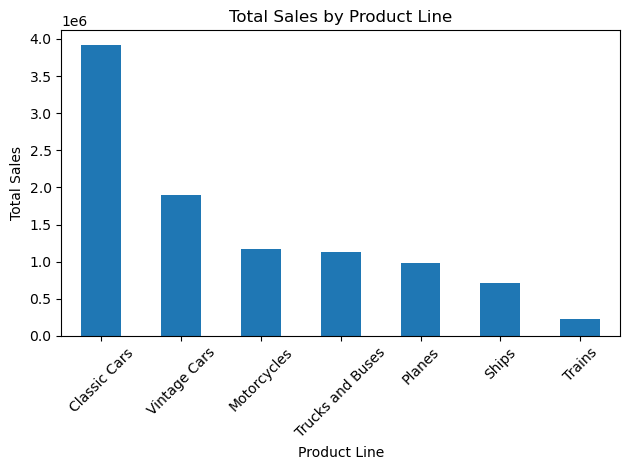

In [108]:
top_sales.plot(kind = 'bar', legend=False)
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show

### 📈 Monthly Sales Trend
```markdown
## 📈 Monthly Sales Trend

We wanted to understand how sales change over time. We created a new column `order_year_month` to group sales by month.

```python
df['order_year_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_year_month')['sales'].sum()

In [110]:
df['order_month'] = df['order_date'].dt.to_period('M')

In [111]:
monthly_sales = df.groupby('order_month')['sales'].sum()

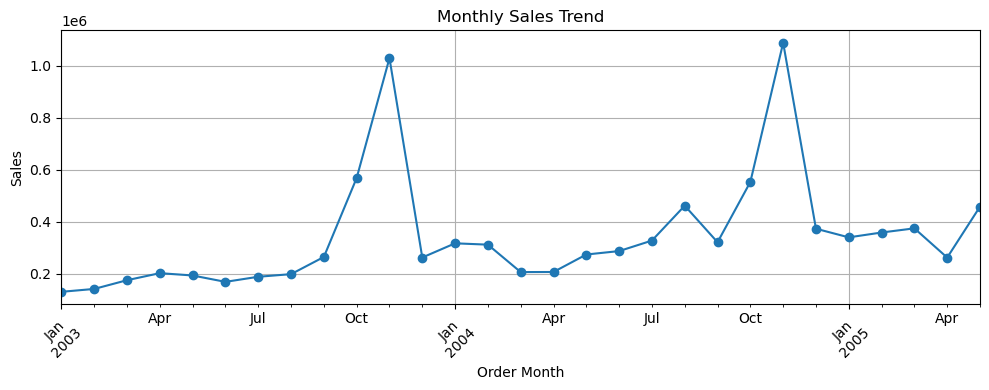

In [112]:
monthly_sales.plot(kind = 'line', marker = 'o', figsize = (10,4), title = 'Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Order Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 🧼 Preparing for Tableau
```markdown
## 🧼 Preparing for Tableau

- We formatted the `order_year_month` column to a proper datetime format using `.dt.to_timestamp()`.
- This ensures better visualization alignment on Tableau’s timeline axes.

In [114]:
df['order_month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()

In [115]:
monthly_sales = df.groupby('order_month')['sales'].sum().reset_index()

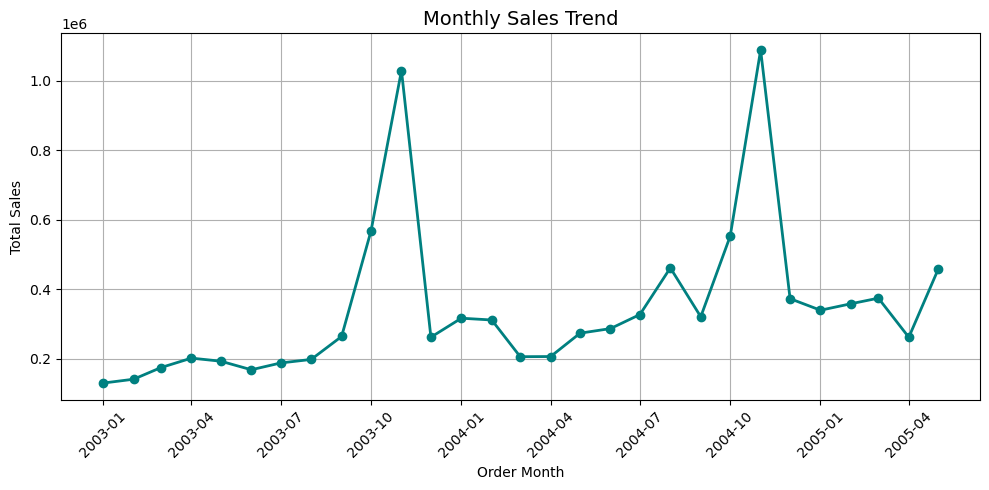

In [140]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['order_month'], monthly_sales['sales'], color='teal', linewidth=2, marker='o')

plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_sales.png',dpi =300)
plt.show()

## ✅ Summary

- **Top-Selling Product Line**: Classic Cars
- **Monthly Trend**: Seasonal peaks observed around mid-year.
- **Next Steps**: Export visualizations and notebook to GitHub and Tableau Public for your portfolio.